Spark Session Initialized successfully.
Generating a synthetic dataset with 1000000 rows...
Dataset generated successfully!

--- Insight 1: Total Revenue by Category ---
+--------------+---------+
|      Category|  Revenue|
+--------------+---------+
|      Clothing|446355771|
|Home & Kitchen|404117425|
|   Electronics|279732995|
|         Books|215809673|
|        Sports| 54176865|
+--------------+---------+


--- Insight 2: High Value Transactions (> 3000) ---
Number of high-value transactions: 114479


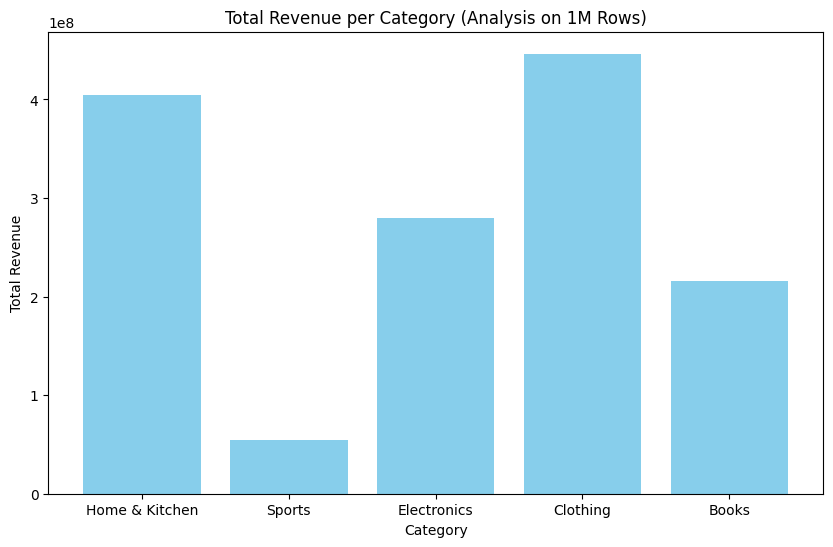

In [2]:
# ==========================================
# TASK 1: BIG DATA ANALYSIS USING PYSPARK
# AUTHOR: [Your Name]
# INTERNSHIP: CodeTech IT Solutions
# ==========================================

# 1. Install PySpark (Important for Google Colab)
!pip install pyspark

# 2. Import Libraries
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, rand, floor, expr
import matplotlib.pyplot as plt
import pandas as pd

# 3. Start Spark Session
spark = SparkSession.builder \
    .appName("CodeTech_Task1_BigDataAnalysis") \
    .getOrCreate()

print("Spark Session Initialized successfully.")

# 4. Generate 1 Million Rows of Fake Data (Scalability Demo)
num_rows = 1000000  # 10 Laksham data points

print(f"Generating a synthetic dataset with {num_rows} rows...")

df = spark.range(0, num_rows).withColumnRenamed("id", "TransactionID")

# Create Random Categories and Prices
df = df.withColumn("Category", expr(f"CASE WHEN rand() < 0.2 THEN 'Electronics' " +
                                       "WHEN rand() < 0.4 THEN 'Clothing' " +
                                       "WHEN rand() < 0.6 THEN 'Home & Kitchen' " +
                                       "WHEN rand() < 0.8 THEN 'Books' " +
                                       "ELSE 'Sports' END"))

df = df.withColumn("Quantity", floor(rand() * 10) + 1)
df = df.withColumn("Price", floor(rand() * 490) + 10)
df = df.withColumn("TotalAmount", col("Quantity") * col("Price"))

print("Dataset generated successfully!")

# 5. Show Analysis Results
print("\n--- Insight 1: Total Revenue by Category ---")
category_sales = df.groupBy("Category").sum("TotalAmount").withColumnRenamed("sum(TotalAmount)", "Revenue")
category_sales.sort(col("Revenue").desc()).show()

print("\n--- Insight 2: High Value Transactions (> 3000) ---")
high_value_count = df.filter(col("TotalAmount") > 3000).count()
print(f"Number of high-value transactions: {high_value_count}")

# 6. Visualize Data (Graph)
pdf_sales = category_sales.toPandas()

plt.figure(figsize=(10, 6))
plt.bar(pdf_sales['Category'], pdf_sales['Revenue'], color='skyblue')
plt.xlabel('Category')
plt.ylabel('Total Revenue')
plt.title('Total Revenue per Category (Analysis on 1M Rows)')
plt.show()

# Stop Spark
spark.stop()